# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs we create are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Data path
path =r'C:\Users\ANITA BOADU\New York City Bikes'

In [4]:
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','citibike_cleaned_updated.csv'),index_col=False)

In [5]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_min', 'age'],
      dtype='object')


## Data Cleaning and Feature Engineering
The dataset has been thoroughly cleaned and prepared for analysis. Key steps and enhancements include:

### Trip Duration

Converted from seconds (tripduration) to minutes (trip_duration_minutes) for improved interpretability.
### Birth Year / Age

- Transformed birth_year into age.
- Missing values in age were filled with the median to ensure a complete dataset for analysis.
### New Columns Introduced

1. trip_duration_minutes – representing the duration of trips in minutes.
2. age – representing the rider’s age with missing values imputed.

These changes ensure the dataset is clean, consistent, and ready for visualization and geospatial analysis.

# Data Visualisation (Scatterplot)

## 1. Trip Duration vs Age

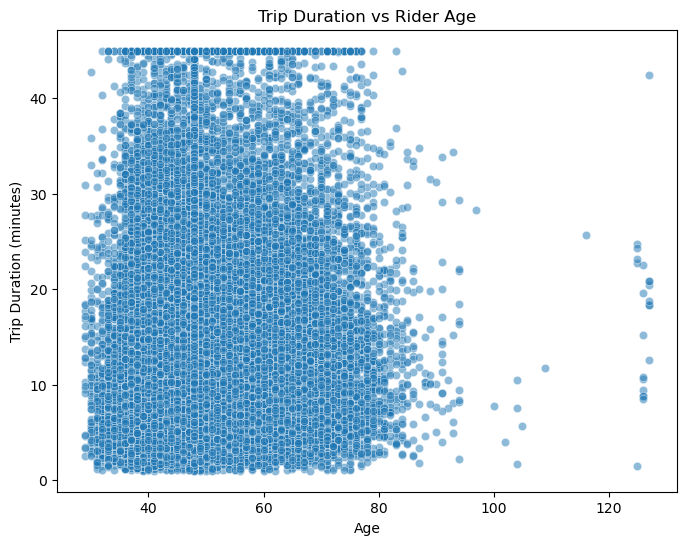

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "trip_duration_vs_age.png")

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="age",
    y="trip_duration_min",
    alpha=0.5
)

plt.title("Trip Duration vs Rider Age")
plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


# 📊Exploratory Data Analysis: Scatterplot Insights

## 1. Trip Duration vs Rider Age

- Most riders are between 30 and 70 years old, and their trips usually last between 5 and 30 minutes.
- A small number of extreme ages (over 100) appear in the data, which are likely the result of data entry errors rather than actual rider ages.
- There is no clear relationship between age and trip duration, as trip lengths remain relatively consistent across different age groups.
- This indicates that age does not significantly influence how long trips last.

## 2. Trip Duration vs Start Hour

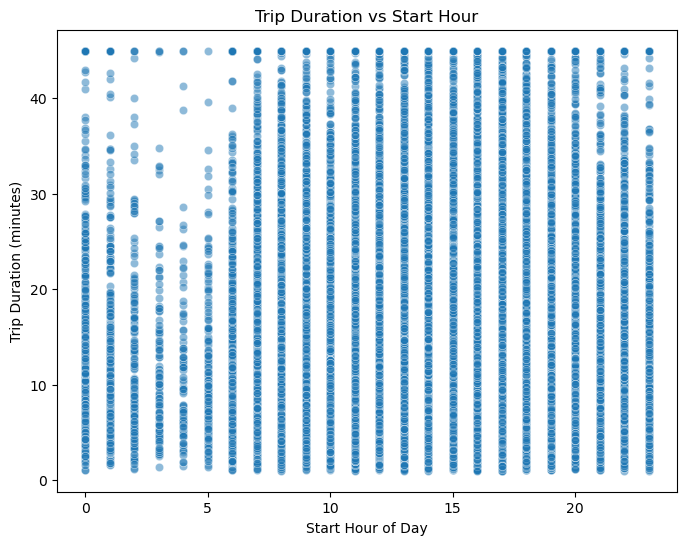

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "trip_duration_vs_start_hour.png")

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="start_hour",
    y="trip_duration_min",
    alpha=0.5
)

plt.title("Trip Duration vs Start Hour")
plt.xlabel("Start Hour of Day")
plt.ylabel("Trip Duration (minutes)")

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 2. Trip Duration vs Start Hour
- Trips take place throughout the day, with the majority lasting between 5 and 30 minutes.
- Trip activity is highest during the morning (7–9 AM) and evening (5–7 PM) peak hours, reflecting typical commuting behavior.
- While a few longer-duration outliers are present, they are uncommon
- Overall, the start hour does not have a strong impact on trip duration, though it appears to significantly influence the number of trips taken.

## 3. Geographic Scatterplot of Stations

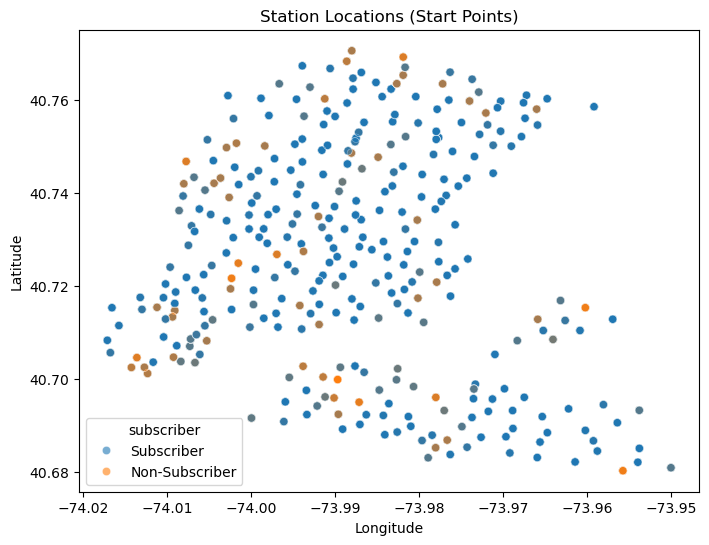

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "station_locations_start.png")

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="start_station_longitude",
    y="start_station_latitude",
    hue="subscriber",
    alpha=0.6
)

plt.title("Station Locations (Start Points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 3. Geographic Scatterplot of Stations (Subscribers vs Non-Subscribers)

- Stations are densely located in central urban areas, with fewer stations toward the outskirts.
- Subscribers (blue) account for the majority of trips, indicating they are the primary user group and likely rely on bikes for regular commuting.
- In contrast, non-subscribers (orange/gray) make up a smaller portion of trips and are more widely dispersed, suggesting more occasional or recreational use
- This underscores a clear distinction between regular and occasional riders.

## ✅Summary Across All Plots

- Age: Trip duration shows little variation with age, though most riders are middle-aged.
- Start Hour: Trip lengths are generally consistent throughout the day, but higher activity occurs during morning and evening commute peaks.
- Subscribers vs. Non-Subscribers: Subscribers make up the majority of trips, primarily in central areas, whereas non-subscribers ride less frequently and more sporadically.

In [9]:
import pandas as pd
import numpy as np

# Load the dataset
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','citibike_cleaned_updated.csv'),index_col=False)

# Reshape the variables into numpy arrays
X = df['age'].values.reshape(-1, 1)   # Independent variable
y = df['trip_duration_min'].values.reshape(-1, 1)   # Dependent variable

In [10]:
X

array([[58],
       [43],
       [37],
       ...,
       [65],
       [48],
       [46]], shape=(50000, 1))

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35000, 1)
X_test shape: (15000, 1)
y_train shape: (35000, 1)
y_test shape: (15000, 1)


# 📌Data Prep for Regression Analysis

In [12]:
# 📌 Data Prep for Regression Analysis

import pandas as pd
import numpy as np

# Load dataset (update path if needed)
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','citibike_cleaned_updated.csv'),index_col=False)

# Check for missing values in key columns
print(df[['age', 'trip_duration_min']].isnull().sum())

# Independent variable (X): Age
# Dependent variable (y): Trip Duration (minutes)
X = df['age'].values.reshape(-1, 1)
y = df['trip_duration_min'].values.reshape(-1, 1)

# Preview arrays
print("First 10 values of X (Age):")
print(X[:10])

print("\nFirst 10 values of y (Trip Duration Minutes):")
print(y[:10])

# Check shapes (important for sklearn)
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

age                  0
trip_duration_min    0
dtype: int64
First 10 values of X (Age):
[[58]
 [43]
 [37]
 [38]
 [48]
 [40]
 [32]
 [57]
 [33]
 [43]]

First 10 values of y (Trip Duration Minutes):
[[16.55      ]
 [ 9.68333333]
 [ 6.01666667]
 [ 9.35      ]
 [38.26666667]
 [ 7.11666667]
 [10.65      ]
 [ 4.38333333]
 [11.1       ]
 [ 9.7       ]]

Shape of X: (50000, 1)
Shape of y: (50000, 1)


## Data Preparation for Regression Analysis
Before running regression, we need to prepare our data in a format that scikit-learn can use. Scikit-learn expects the independent variable(s) (X) and the dependent variable (y) to be in the form of NumPy arrays.

- Independent variable (X): Rider Age (age)
- Dependent variable (y): Trip Duration (trip_duration_min)
We reshape these columns into arrays because scikit-learn’s regression models require X to be a 2D array (rows = samples, columns = features) and y to be a 2D or 1D array depending on the model.

This step ensures that our dataset is clean, structured, and ready for training and testing in the regression analysis.

## 📌Example: Scatterplot of Trips vs Unique Destinations per Station

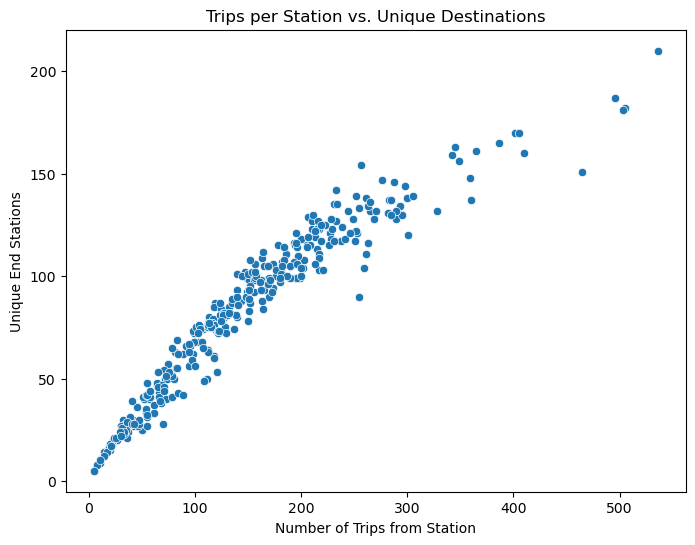

In [13]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "trips_vs_unique_destinations.png")

# Aggregate data by start station
station_data = (
    df.groupby("start_station_name")
    .agg(
        num_trips=("trip_duration_min", "count"),  # total trips from this station
        unique_destinations=("end_station_name", lambda x: x.nunique())  # unique end stations
    )
    .reset_index()
)

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="num_trips", y="unique_destinations", data=station_data)

plt.title("Trips per Station vs. Unique Destinations")
plt.xlabel("Number of Trips from Station")
plt.ylabel("Unique End Stations")

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()



## 📊Interpretation: Trips per Station vs. Unique Destinations

This scatterplot shows the relationship between the number of trips starting from a station (x-axis) and the number of unique end stations those trips connect to (y-axis).

- There is a clear positive relationship: stations with higher trip volumes tend to connect to a greater number of unique destinations. 
- Stations with low trip counts typically link to only a few destinations, while those with increasing trip numbers show a steady growth in destination variety. 
- A few high-traffic stations (e.g., 400–500+ trips) connect to over 150–200 unique destinations, emphasizing their role as key hubs. 
- This indicates that busier stations not only accommodate more rides but also offer a wider range of routes, functioning as central nodes within the bike network.

**✅Hypothesis Supported** : If a station has more trips, it also tends to have more unique destinations.

In [14]:
# 📌 Reshape variables into NumPy arrays for regression

# Independent variable (X): Number of trips from a station
X = station_data['num_trips'].values.reshape(-1, 1)

# Dependent variable (y): Unique destinations from that station
y = station_data['unique_destinations'].values.reshape(-1, 1)

# Preview arrays
print("First 10 values of X (Num Trips):")
print(X[:10])

print("\nFirst 10 values of y (Unique Destinations):")
print(y[:10])

# Check shapes
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

First 10 values of X (Num Trips):
[[213]
 [163]
 [143]
 [ 75]
 [170]
 [119]
 [165]
 [199]
 [265]
 [151]]

First 10 values of y (Unique Destinations):
[[119]
 [109]
 [ 88]
 [ 57]
 [ 90]
 [ 87]
 [ 93]
 [ 99]
 [132]
 [ 83]]

Shape of X: (330, 1)
Shape of y: (330, 1)


In [15]:
# 1. Make sure your model is trained
from sklearn.linear_model import LinearRegression

# Example: model trained on training data
model = LinearRegression()
model.fit(X_train, y_train)  # X_train, y_train must exist

# 2. Make predictions on the test set
y_pred = model.predict(X_test)

# 3. Create a DataFrame comparing actual and predicted values
comparison = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

# 4. Show first 30 rows
comparison.head(30)


,Actual,Predicted
0,5.700000,14.174420
1,15.100000,13.895410
2,10.433333,14.104667
3,7.500000,13.993063
4,9.333333,14.020964
5,5.066667,13.867509
6,3.016667,14.090717
7,29.016667,13.895410
8,4.033333,13.923311
9,21.616667,13.993063


In [16]:
from sklearn.model_selection import train_test_split

# 1. Split data using the names YOU defined (X and y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (231, 1)
X_test shape: (99, 1)
y_train shape: (231, 1)
y_test shape: (99, 1)


 ## 📌Splitting Data into Training and Test Sets
 
 To evaluate our regression model properly, we split the dataset into two parts:

- Training set (70%) → used to train the regression model.
- Test set (30%) → used to evaluate how well the model performs on unseen data.
This ensures that we don’t just measure how well the model memorizes the data, but also how well it generalizes.

We use the train_test_split function from scikit-learn to do this. The random_state=42 parameter ensures that the split is reproducible — meaning that every time we run the code, we’ll get the same train/test division of data.

# Regression Analysis

In [17]:
from sklearn.linear_model import LinearRegression

# Step 1: Create a regression object
regression = LinearRegression()

In [18]:
# Step 2: Fit the regression object to the training data
regression.fit(X_train, y_train)

print("Model fitted successfully!")

Model fitted successfully!


In [19]:
# Use the regression model to predict values for the test set
y_predicted = regression.predict(X_test)

# Preview first 10 predictions vs actual values
print("Predicted values:", y_predicted[:10].flatten())
print("Actual values:", y_test[:10].flatten())

Predicted values: [ 84.11648089  61.30948904  82.89467775 144.79936991  88.59642571
  93.07637054  31.57894609 146.83570847  76.37839437  65.38216615]
Actual values: [ 83  66  90 138  98  92  18 139  82  74]


# 📊Training Set Visualization

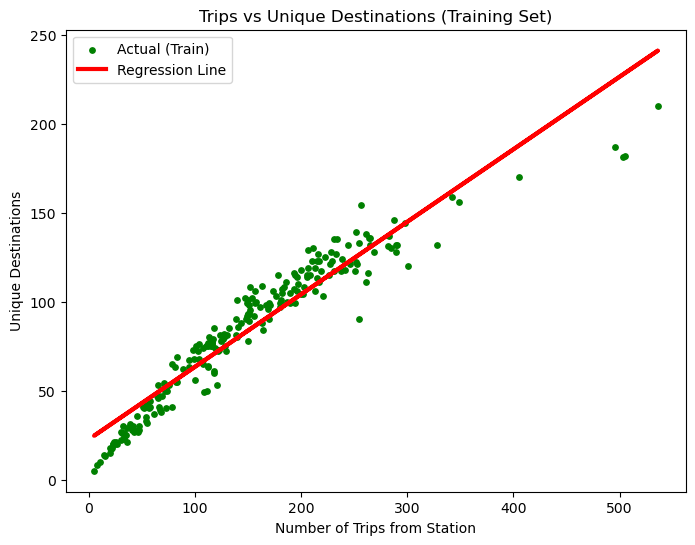

In [20]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "regression_train_scatter.png")

# Predict values for the training set
y_predicted_train = regression.predict(X_train)

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='green', s=15, label='Actual (Train)')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Regression Line')

plt.title('Trips vs Unique Destinations (Training Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊Interpretation: Training Set Regression

This plot shows the relationship between Number of **Trips from a Station** (x-axis) and **Unique Destinations** (y-axis) for the **training set**.

- The **green dots** represent the actual data points.
- The **red line** represents the regression line fitted by the model.
- We can see a **clear linear trend**: as the number of trips from a station increases, the number of unique destinations also increases.
- Most points are close to the regression line, which indicates that the model is capturing the relationship well.

✅ This suggests that the model has been trained successfully and is a good fit for the training data.

## 📊Test Set Visualization

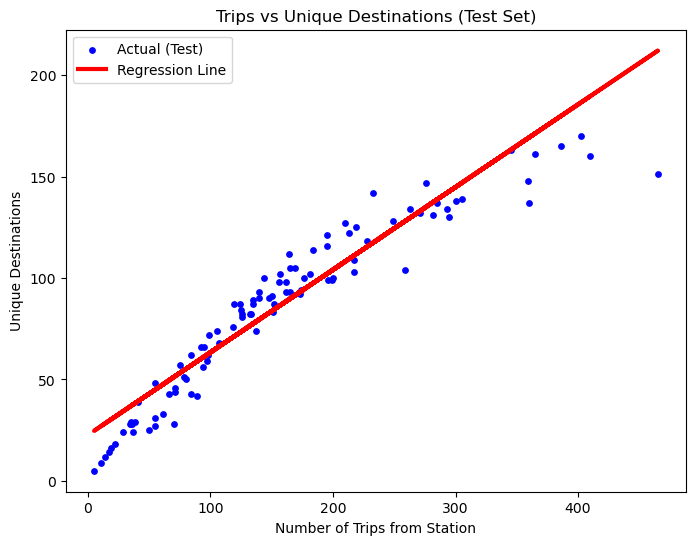

In [21]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "regression_test_scatter.png")

# Scatterplot with regression line for test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', s=15, label='Actual (Test)')
plt.plot(X_test, y_predicted, color='red', linewidth=3, label='Regression Line')

plt.title('Trips vs Unique Destinations (Test Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Interpretation: Test Set Regression

This plot shows the model’s performance on the **test set** (data not used for training).

- The **blue dots** represent the actual test data points.
- The **red line** represents the regression model’s predictions.
- The points are closely clustered around the regression line, which suggests that the model generalizes well to unseen data.
- There are some small deviations (a few points above or below the line), but overall the linear relationship holds strongly.

✅ This confirms that the model is reliable, not just for the training data, but also for new/unseen data. The regression successfully captures the relationship between the **number of trips from a station** and the **number of unique destinations**.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
slope = regression.coef_[0][0]
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)   # <-- define RMSE here
r2 = r2_score(y_test, y_predicted)

# Print results
print('Slope:', regression.coef_)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Slope: [[0.40726771]]
Mean Squared Error: 182.7478291859797
Root Mean Squared Error: 13.518425543900433
R2 Score: 0.8967570071833406


In [23]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(),
                     'Predicted': y_predicted.flatten()})

In [24]:
# Show first 30 rows
data.head(30)


,Actual,Predicted
0,83,84.116481
1,66,61.309489
2,90,82.894678
3,138,144.799370
4,98,88.596426
5,92,93.076371
6,18,31.578946
7,139,146.835708
8,82,76.378394
9,74,65.382166


## 📊 Model Evaluation Results

- **Slope (0.41)**:
For every additional trip from a station, the model predicts about **0.41 more unique destinations**.
This shows a strong positive relationship — busier stations tend to connect with more destinations.


- **Mean Squared Error (182.75) & RMSE (13.52)**:
On average, the model’s predictions differ from the actual number of unique destinations by about **13 destinations**. Given that the range of destinations spans up to ~180, this error is relatively small.


- **R² Score (0.897)**:
The model explains about **89.7% of the variance** in unique destinations based on the number of trips.
This indicates an **excellent fit**, showing that the linear regression model is highly effective in capturing this relationship.


✅ Conclusion
The regression analysis strongly confirms the hypothesis that **stations with higher trip volumes are connected to a greater number of unique destinations**. The model demonstrates high predictive performance, with an R² value close to 0.9 and a relatively low error (RMSE ≈ 13), indicating that it is a reliable and effective predictor for this dataset.

## Compare how the regression fits the training set

In [25]:
# Predict values for the training set
y_predicted_train = regression.predict(X_train)

# Calculate training metrics
mse_train = mean_squared_error(y_train, y_predicted_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_predicted_train)

print("Training Set Results:")
print('Slope:' ,regression.coef_)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R2 Score:", r2_train)

Training Set Results:
Slope: [[0.40726771]]
Mean Squared Error: 140.40067236876254
Root Mean Squared Error: 11.849078967108056
R2 Score: 0.912116406339802


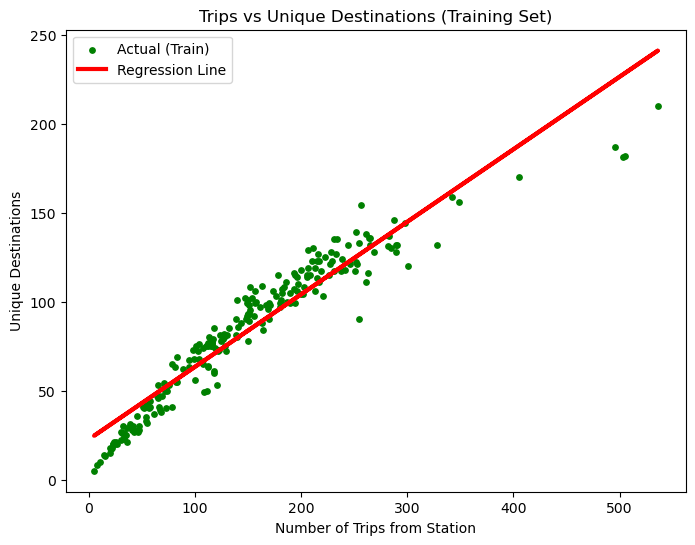

In [26]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "regression_train_scatter.png")

# Scatterplot with regression line for training set
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='green', s=15, label='Actual (Train)')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Regression Line')

# Set title and labels
plt.title('Trips vs Unique Destinations (Training Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Training Set Results – Interpretation

- **Slope (0.41)**: Each additional trip from a station is associated with an increase of approximately **0.41 unique destinations**, confirming a strong positive relationship between trip volume and destination diversity.

- **Mean Squared Error (140.40) / RMSE (11.85)**: On average, the model’s predictions differ from the actual values by about **12 destinations** on the training set, which is relatively small given the overall range of destinations (0–200+).

- **R² Score (0.91)**: The model accounts for **91% of the variability** in the number of unique destinations, indicating an excellent fit to the training data.

✅ Overall, the model effectively captures the underlying linear relationship in the training set.

## 📊 Model Performance on Test Set

- **Slope**: ~0.41 (similar to training, showing consistency).
- **MSE**: 182.75
- **RMSE**: 13.52
- **R² Score**: 0.897

👉 Comparison:

- The **R² value decreases slightly** from 0.91 on the training set to 0.897 on the test set, but it remains very strong. - **The RMSE increases modestly** from 11.85 to 13.52, indicating slightly larger prediction errors on unseen data. These minor changes are expected and suggest that the model **generalizes well**.

✅ There is no evidence of overfitting, as the model shows strong and consistent performance on both the training and test sets.

## 🔎 Reflections on Possible Data Bias

- **Station Popularity Bias**: High-traffic central stations naturally produce more trips and connect to more destinations, which may disproportionately influence the model.

- **Geographic Bias**: Stations located in central areas versus peripheral locations may exhibit systematically different travel patterns.

- **User Type Bias**: Differences in behavior between subscribers (commuters) and non-subscribers (tourists) are not captured, as user type was not included in the model.

- **Temporal Bias**: The data may represent a specific season, event, or time period, which could limit how well the results generalize to other contexts.

- **Outliers**: A small number of stations with exceptionally high trip volumes may exert undue influence on the regression results.

## ✅ Overall Summary

The regression model demonstrates strong performance on both the **training** and **test** datasets **(R² ≈ 0.9)**, reinforcing the hypothesis that **stations with higher trip volumes are associated with a greater number of unique destinations**. 
Although the model is highly accurate, incorporating potential sources of bias—such as station location, time period, and rider type—in future analyses would help further validate and strengthen these conclusions.